In [4]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
import torchvision.datasets as datasets


# **Modified Code**

In [5]:
class RotationDataset(torch.utils.data.Dataset):
    """Dataset that generates rotated versions of images with rotation labels (0°, 90°, 180°, 270°)."""
    def __init__(self, dataset):
        self.dataset = dataset
        self.rotations = [0, 90, 180, 270]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]

        rotated_images = []
        rotation_labels = []

        for rotation in self.rotations:
            rotated_image = transforms.functional.rotate(image, rotation)
            rotated_images.append(rotated_image)
            rotation_labels.append(self.rotations.index(rotation))

        return rotated_images, rotation_labels

# Explanation of rotation_collate function

The `rotation_collate` function is a custom collate function used with PyTorch's DataLoader. Here's the function:


In [6]:
def rotation_collate(batch):
    all_images = []
    all_labels = []
    for images, labels in batch:
        all_images.extend(images)
        all_labels.extend(labels)
    return torch.stack(all_images), torch.tensor(all_labels)

**Use case**
```python
unsupervised_train_loader = DataLoader(RotationDataset(unsupervised_train_set),
                                       batch_size=64,  # This will result in 256 images per batch
                                       shuffle=True,
                                       num_workers=8,
                                       persistent_workers=True,
                                       collate_fn=rotation_collate)

unsupervised_val_loader = DataLoader(RotationDataset(unsupervised_val_set),
                                     batch_size=64,  # This will result in 256 images per batch
                                     shuffle=False,
                                     num_workers=8,
                                     persistent_workers=True,
                                     collate_fn=rotation_collate)


---

# **Test Code**

In [9]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x / 255.0)  # Simple scaling instead of normalization
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

Batch shape: torch.Size([256, 1, 28, 28])
Labels shape: torch.Size([256])
Unique labels: tensor([0, 1, 2, 3])
Image value range: [0.00, 0.00]


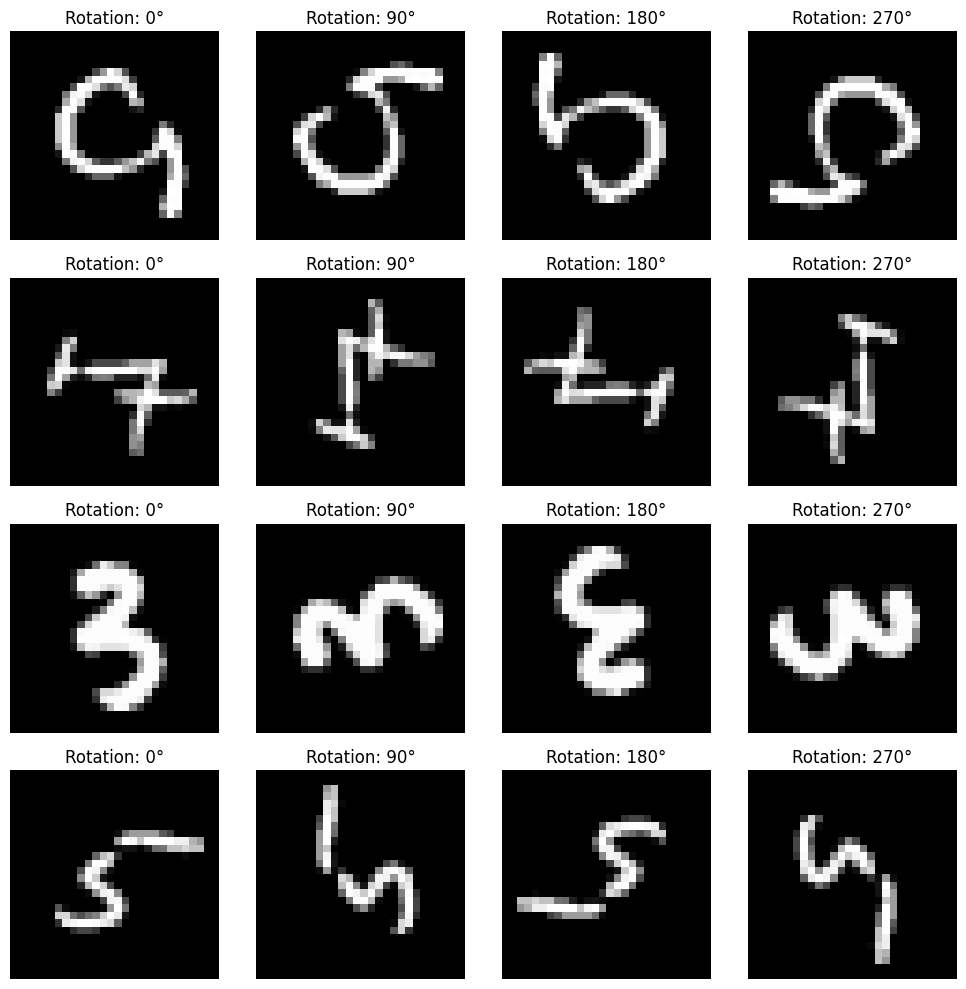

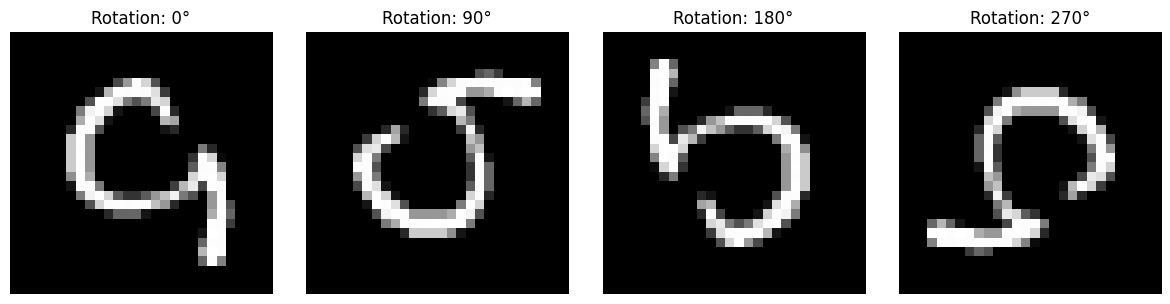

In [10]:
# Create the unsupervised loader
unsupervised_train_loader = DataLoader(RotationDataset(mnist_train),
                                       batch_size=64,  # This will result in 256 images per batch
                                       shuffle=True,
                                       num_workers=2,
                                       collate_fn=rotation_collate)

# Function to display a batch of images
def show_batch(images, labels):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title(f'Rotation: {labels[i]*90}°')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of data and display it
images, labels = next(iter(unsupervised_train_loader))

print(f"Batch shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels: {torch.unique(labels)}")
print(f"Image value range: [{images.min():.2f}, {images.max():.2f}]")

# Display the first 16 images from the batch
show_batch(images[:16], labels[:16])

# Verify that we have all rotations for the same digit
original_image = images[0]
rotations = [0, 90, 180, 270]

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, rotation in enumerate(rotations):
    rotated = transforms.functional.rotate(original_image, rotation)
    axes[i].imshow(rotated[0], cmap='gray')
    axes[i].set_title(f'Rotation: {rotation}°')
    axes[i].axis('off')
plt.tight_layout()
plt.show()